# CH05 이산형 확률변수

## 5.1 1차원 이산형 확률변수

In [2]:
import numpy as np
import matplotlib.pyplot as plt

%precision 3
%matplotlib inline

In [4]:
# 불공정한 주사위가 취할 수 있는 값의 집합
x_set = np.array([1, 2, 3, 4, 5, 6])
x_set

array([1, 2, 3, 4, 5, 6])

### < PMF, Probability Mass Function (확률(질량)함수) >

In [5]:
def f(x):
    if x in x_set:
        # 확률 분포를 return
        return x/21
    else:
        return 0

In [49]:
X = [x_set, f]

In [52]:
# 확률 p_k를 구한다
prob_x = np.array([f(x_k) for x_k in x_set])

# x_k와 p_k의 대응을 사전식으로 표시
dict(zip(x_set, prob_x))

{np.int64(1): 0.048,
 np.int64(2): 0.095,
 np.int64(3): 0.143,
 np.int64(4): 0.190,
 np.int64(5): 0.238,
 np.int64(6): 0.286}

In [53]:
# 모든 확률은 더하면 1이 된다!
np.sum(prob_x)

1.000

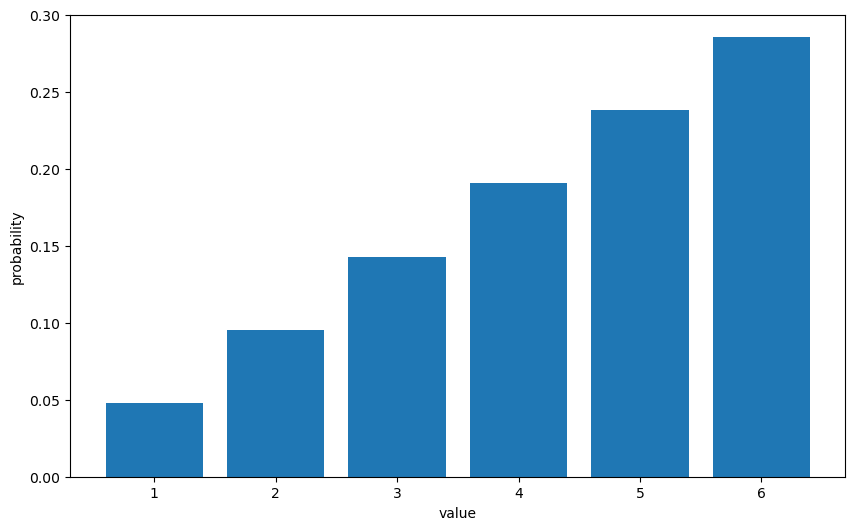

In [54]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.bar(x_set, prob)
ax.set_xlabel('value')
ax.set_ylabel('probability')

plt.show()

### =====================< dictionary 실습 > =====================

In [42]:
a = {'사과':1, '딸기':5, '귤':10}
a
# 순서를 임의로 변경하였으나 교재에 있는 모든 실습 코드를 작성하였음.

{'사과': 1, '딸기': 5, '귤': 10}

In [29]:
v1 = a['딸기']
v1

5

In [30]:
v1 = a.get('딸기')
v1

5

In [32]:
f1 = '딸기' in a
f1

True

In [33]:
f2 = '레몬' not in a
f2

True

In [34]:
f3 = '레몬' in a
f3

False

In [31]:
# v2 = a['레몬']
# 오류 발생

v2 = a.get('레몬')
v2

In [20]:
a = {('초콜릿', 200):20, ('마카롱', 500):15, ('쿠키', 300):30}
a

{('초콜릿', 200): 20, ('마카롱', 500): 15, ('쿠키', 300): 30}

In [35]:
a = {'초콜릿':1, '마카롱':2, '쿠키':3}
a['초콜릿'] = 'One'
a['마카롱'] = 'Two'
a['쿠키'] = 'Three'
a

{'초콜릿': 'One', '마카롱': 'Two', '쿠키': 'Three'}

In [36]:
d = dict(초콜릿 = 20, 마카롱 = 15, 쿠키 = 30)
d

{'초콜릿': 20, '마카롱': 15, '쿠키': 30}

In [37]:
key = ['초콜릿', '마카롱', '쿠키']
value = [20, 15, 30]
d = dict(zip(key, value))
d

{'초콜릿': 20, '마카롱': 15, '쿠키': 30}

In [39]:
d = dict([('초콜릿', 20), ('마카롱', 15), ('쿠키', 30)])
d

{'초콜릿': 20, '마카롱': 15, '쿠키': 30}

### ================================================================

### < CDF, Cumulative Distribution Function ((누적) 분포 함수) >

In [43]:
def F(x):
    return np.sum([f(x_k) for x_k in x_set if x_k <= x])

In [44]:
F(3)

0.286

### 확률변수의 변환

In [63]:
y_set = np.array([2 * x_k + 3 for x_k in x_set])
prob_y = np.array([f(x_k) for x_k in x_set])

print('확률변수 X의 확률')
dict(zip(y_set, prob_y))

확률변수 X의 확률


{np.int64(5): 0.048,
 np.int64(7): 0.095,
 np.int64(9): 0.143,
 np.int64(11): 0.190,
 np.int64(13): 0.238,
 np.int64(15): 0.286}

In [61]:
print('확률변수 X의 확률')
dict(zip(x_set, prob))

확률변수 X의 확률


{np.int64(1): 0.048,
 np.int64(2): 0.095,
 np.int64(3): 0.143,
 np.int64(4): 0.190,
 np.int64(5): 0.238,
 np.int64(6): 0.286}

### < 기댓값 (expected value) >

In [64]:
np.sum([x_k * f(x_k) for x_k in x_set])

4.333

### =====================< choice 실습 > =====================

In [66]:
np.random.choice(5, 5, replace=False)
# shuffle 명령과 동일

array([4, 0, 1, 3, 2], dtype=int32)

In [67]:
np.random.choice(5, 3, replace=False)
# 3개만 선택

array([1, 0, 3], dtype=int32)

In [68]:
np.random.choice(5, 10)
# 반복해서 10개 선택

array([4, 0, 0, 4, 0, 3, 2, 1, 3, 1], dtype=int32)

In [69]:
np.random.choice(5, 10, p = [0.1, 0, 0.3, 0.6, 0])
# 선택 확률을 다르게 해서 10개 선택

array([3, 2, 2, 3, 3, 2, 2, 2, 2, 3], dtype=int32)

### =======================================================

In [70]:
sample = np.random.choice(x_set, int(1e6), p=prob)
np.mean(sample)

4.334

In [71]:
def E(X, g=lambda x: x):
    x_set, f = X
    return np.sum([g(x_k) * f(x_k) for x_k in x_set])

In [72]:
E(X)

4.333

In [73]:
E(X, g=lambda x: 2*x + 3)

11.667

In [74]:
2 * E(X) + 3

11.667

In [76]:
strings = ['hyeja', 'parkhyeja', 'youngtea', 'kimyoungtea', 'bbangtea']

In [77]:
strings

['hyeja', 'parkhyeja', 'youngtea', 'kimyoungtea', 'bbangtea']

In [78]:
2 * E(X) + 3

11.667

In [80]:
mean = E(X)
np.sum([(x_k-mean)**2 * f(x_k) for x_k in x_set])

2.222

In [87]:
def V(X, g=lambda x: x):
    x_set, f = X
    mean = E(X, g)
    return np.sum([g(x_k) - mean) ** 2 * f(x_k) for x_k in x_set]

SyntaxError: closing parenthesis ')' does not match opening parenthesis '[' (2354375597.py, line 4)

In [86]:
V(X)

NameError: name 'V' is not defined